<a href="https://colab.research.google.com/github/NDsasuke/Classification-Regression-Clustering/blob/main/Clustering/Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import necessary libraries

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Preprocessing

In [ ]:
# Load image
url = '/content/my sushi.jpg'  # You can replace this URL with your image
img = mpimg.imread(url)

# Preprocess image
img = img / 255  # Normalize values to 0 - 1
img_reshape = img.reshape(-1, 3)  # Flatten the image


Model Building

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


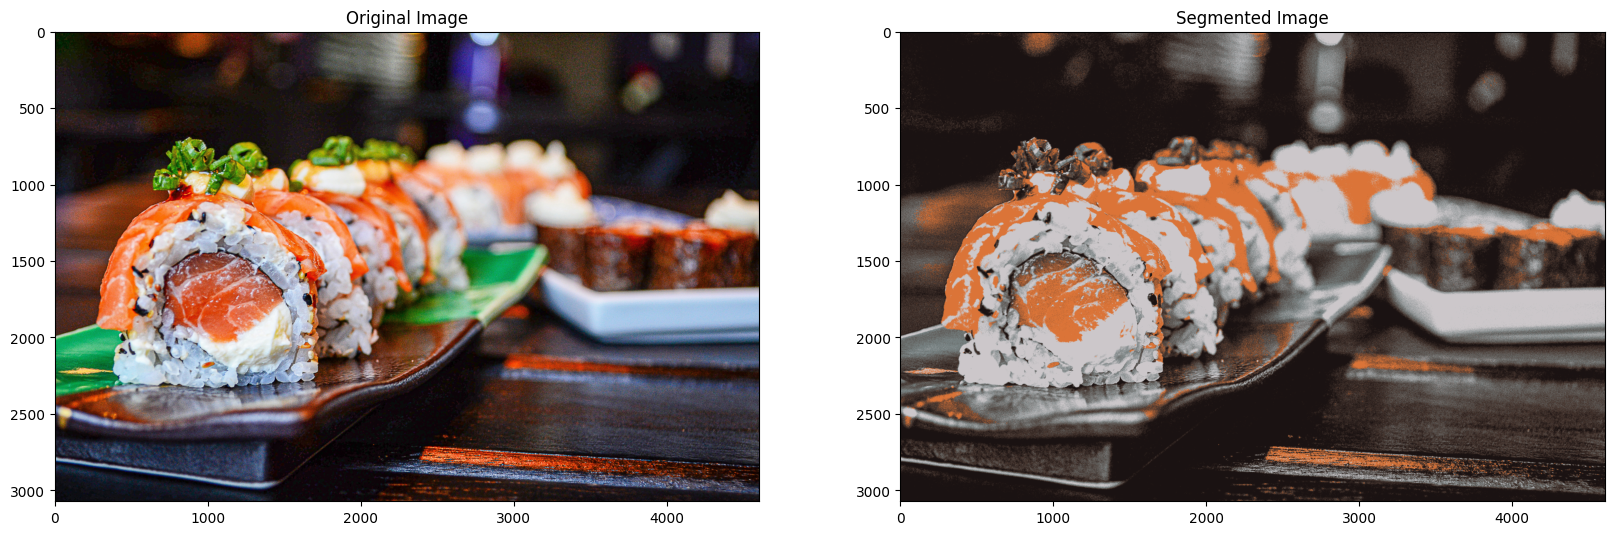

In [3]:
# Define and fit KMeans model
kmeans = KMeans(n_clusters=5)  # You can change the number of clusters
kmeans.fit(img_reshape)

# Replace each pixel value with its nearby centroid
img_seg = kmeans.cluster_centers_[kmeans.labels_]
img_seg = img_seg.reshape(img.shape)  # reshape to original image shape

# Display the original and segmented image
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

ax[0].imshow(img)
ax[0].set_title('Original Image')

ax[1].imshow(img_seg)
ax[1].set_title('Segmented Image')

plt.show()


Analyzing

Cluster 0 represents 40.89% of the image
Cluster 1 represents 17.86% of the image
Cluster 2 represents 10.64% of the image
Cluster 3 represents 9.21% of the image
Cluster 4 represents 21.40% of the image


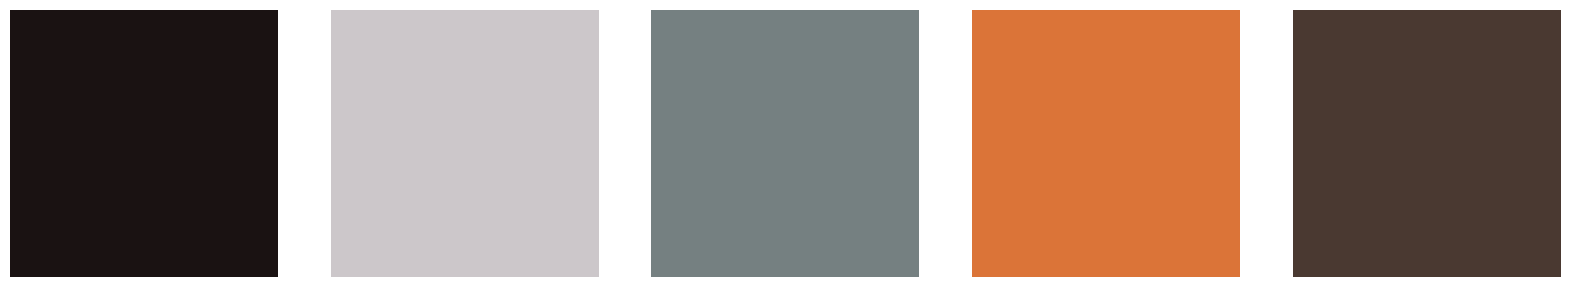

In [4]:
# Import necessary libraries
import numpy as np

# Determine unique labels and their counts
unique_labels, counts = np.unique(kmeans.labels_, return_counts=True)

# Calculate percentages for each cluster
percentages = counts / img_reshape.shape[0] * 100

# Display the percentage of pixels that each color cluster represents
for (label, percentage) in zip(unique_labels, percentages):
    print(f"Cluster {label} represents {percentage:.2f}% of the image")

# Plot each color cluster
fig, axes = plt.subplots(1, len(unique_labels), figsize=(20, 5))

for ax, centroid in zip(axes, kmeans.cluster_centers_):
    ax.imshow([[centroid for _ in range(50)] for _ in range(50)])
    ax.axis('off')

plt.show()


Cluster 0 has 5788341 pixels
Cluster 4 has 3029509 pixels
Cluster 3 has 1303599 pixels
Cluster 2 has 1506503 pixels
Cluster 1 has 2527824 pixels


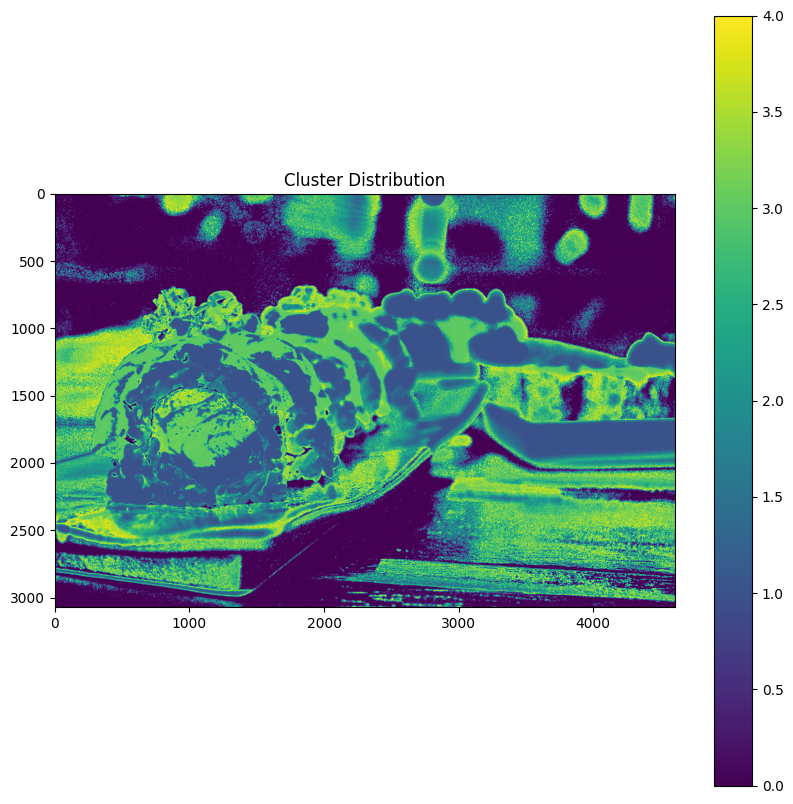

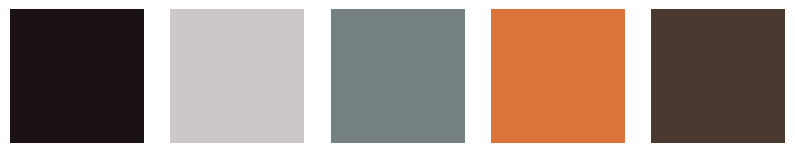

In [5]:
# Import necessary libraries
from collections import Counter

# Determine the sizes of the color clusters
cluster_sizes = Counter(kmeans.labels_)
for cluster, size in cluster_sizes.items():
    print(f'Cluster {cluster} has {size} pixels')

# Determine the distribution of the clusters in the image
cluster_distribution = np.reshape(kmeans.labels_, (img.shape[0], img.shape[1]))

plt.figure(figsize=(10,10))
plt.imshow(cluster_distribution)
plt.title('Cluster Distribution')
plt.colorbar()
plt.show()

# Determine the dominant colors
dominant_colors = kmeans.cluster_centers_

# Display each dominant color
plt.figure(figsize=(10, 2))

for i, color in enumerate(dominant_colors):
    plt.subplot(1, len(dominant_colors), i+1)
    color_img = np.zeros((50, 50, 3))
    color_img[:, :] = color
    plt.imshow(color_img)
    plt.axis('off')

plt.show()
